<a href="https://colab.research.google.com/github/MateusSilva12/pythonProject4/blob/master/trabalhoeliis2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
pd.set_option('display.max_columns', 500)
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import kurtosis
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import het_breuschpagan, het_goldfeldquandt,het_white
from statsmodels.stats.diagnostic import linear_harvey_collier, linear_reset, spec_white
from statsmodels.stats.diagnostic import linear_rainbow
from statsmodels.graphics.regressionplots import plot_leverage_resid2
from yellowbrick.regressor import CooksDistance
from statsmodels.stats.outliers_influence import OLSInfluence, variance_inflation_factor
from sklearn.linear_model import LinearRegression



In [4]:
dados_copa = pd.read_csv('/content/campeonato-brasileiro-estatisticas-full.csv')
dados_copa

,partida_id,rodata,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
0,1,1,Guarani,0,0,NaN,0,NaN,0,0,0,0,0
1,1,1,Vasco,0,0,NaN,0,NaN,0,0,0,0,0
2,2,1,Athletico-PR,0,0,NaN,0,NaN,0,0,0,0,0
3,2,1,Gremio,0,0,NaN,0,NaN,0,0,0,0,0
4,3,1,Flamengo,0,0,NaN,0,NaN,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16045,8023,38,Atletico-MG,17,7,41%,351,82%,19,6,0,0,4
16046,8024,38,Internacional,15,8,48%,287,77%,13,2,0,1,6
16047,8024,38,Palmeiras,11,2,52%,306,82%,17,3,0,2,5
16048,8025,38,Goias,6,2,35%,330,80%,12,2,0,1,3


In [5]:
print(dados_copa.head())

   partida_id  rodata         clube  chutes  chutes_no_alvo posse_de_bola  \
0           1       1       Guarani       0               0           NaN   
1           1       1         Vasco       0               0           NaN   
2           2       1  Athletico-PR       0               0           NaN   
3           2       1        Gremio       0               0           NaN   
4           3       1      Flamengo       0               0           NaN   

   passes precisao_passes  faltas  cartao_amarelo  cartao_vermelho  \
0       0             NaN       0               0                0   
1       0             NaN       0               0                0   
2       0             NaN       0               0                0   
3       0             NaN       0               0                0   
4       0             NaN       0               0                0   

   impedimentos  escanteios  
0             0           0  
1             0           0  
2             0           

In [6]:
dados_copa.describe()

,partida_id,rodata,chutes,chutes_no_alvo,passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
count,16050.000000,16050.000000,16050.000000,16050.000000,16050.000000,16050.000000,16050.000000,16050.000000,16050.000000,16050.000000
mean,4013.000000,20.163240,4.841308,1.207975,159.068910,5.677695,0.862368,0.047664,0.613271,1.976947
std,2316.690109,11.465597,6.924779,2.280282,213.129689,7.793185,1.416964,0.232900,1.209620,3.131383
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2007.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4013.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6019.000000,30.000000,10.000000,2.000000,374.000000,13.000000,2.000000,0.000000,1.000000,4.000000
max,8025.000000,46.000000,37.000000,16.000000,848.000000,34.000000,10.000000,3.000000,10.000000,23.000000


In [7]:
dados_copa.isnull().sum()

partida_id            0
rodata                0
clube                 0
chutes                0
chutes_no_alvo        0
posse_de_bola      9212
passes                0
precisao_passes    9212
faltas                0
cartao_amarelo        0
cartao_vermelho       0
impedimentos          0
escanteios            0
dtype: int64

In [8]:
dados_copa.tail()

,partida_id,rodata,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
16045,8023,38,Atletico-MG,17,7,41%,351,82%,19,6,0,0,4
16046,8024,38,Internacional,15,8,48%,287,77%,13,2,0,1,6
16047,8024,38,Palmeiras,11,2,52%,306,82%,17,3,0,2,5
16048,8025,38,Goias,6,2,35%,330,80%,12,2,0,1,3
16049,8025,38,Sao Paulo,13,7,65%,591,90%,14,1,0,0,4


In [9]:
dados_copa.dtypes

partida_id          int64
rodata              int64
clube              object
chutes              int64
chutes_no_alvo      int64
posse_de_bola      object
passes              int64
precisao_passes    object
faltas              int64
cartao_amarelo      int64
cartao_vermelho     int64
impedimentos        int64
escanteios          int64
dtype: object

In [10]:
dados_copa = dados_copa.dropna()

# Verificar se os valores faltantes foram removidos
print(dados_copa.isnull().sum())

partida_id         0
rodata             0
clube              0
chutes             0
chutes_no_alvo     0
posse_de_bola      0
passes             0
precisao_passes    0
faltas             0
cartao_amarelo     0
cartao_vermelho    0
impedimentos       0
escanteios         0
dtype: int64


In [11]:
dados_copa.corr()

,partida_id,rodata,chutes,chutes_no_alvo,passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
partida_id,1.000000,0.110885,0.373033,0.576078,0.424308,0.338148,0.227235,0.067211,0.058268,0.268289
rodata,0.110885,1.000000,0.009059,-0.010062,-0.018616,0.008726,-0.005805,-0.000707,-0.031618,0.004490
chutes,0.373033,0.009059,1.000000,0.562163,0.679903,0.431920,0.233857,-0.006875,0.243816,0.678529
chutes_no_alvo,0.576078,-0.010062,0.562163,1.000000,0.385440,0.255815,0.122619,-0.010419,0.053598,0.359498
passes,0.424308,-0.018616,0.679903,0.385440,1.000000,0.512535,0.288986,0.019807,0.283285,0.549122
faltas,0.338148,0.008726,0.431920,0.255815,0.512535,1.000000,0.543074,0.089265,0.238194,0.318627
cartao_amarelo,0.227235,-0.005805,0.233857,0.122619,0.288986,0.543074,1.000000,0.074295,0.158908,0.193822
cartao_vermelho,0.067211,-0.000707,-0.006875,-0.010419,0.019807,0.089265,0.074295,1.000000,0.015719,0.010239
impedimentos,0.058268,-0.031618,0.243816,0.053598,0.283285,0.238194,0.158908,0.015719,1.000000,0.228027
escanteios,0.268289,0.004490,0.678529,0.359498,0.549122,0.318627,0.193822,0.010239,0.228027,1.000000


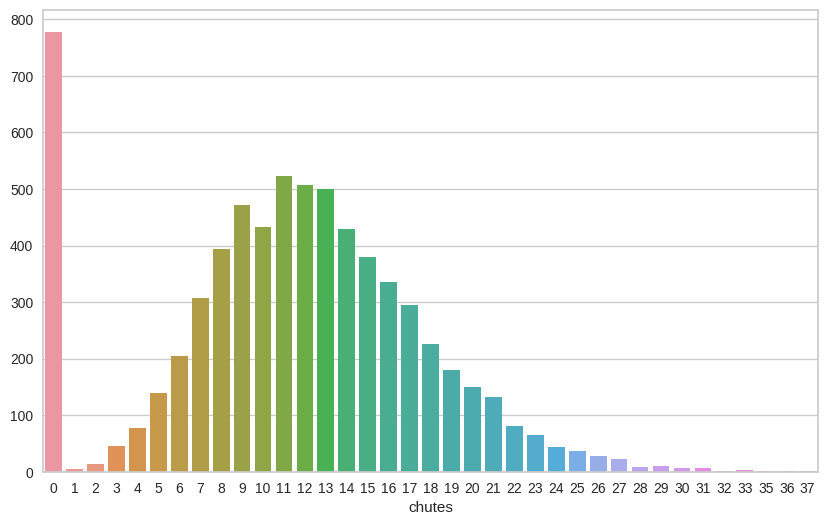

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(x='chutes', data=dados_copa)
plt.xlabel('chutes')
plt.ylabel('');

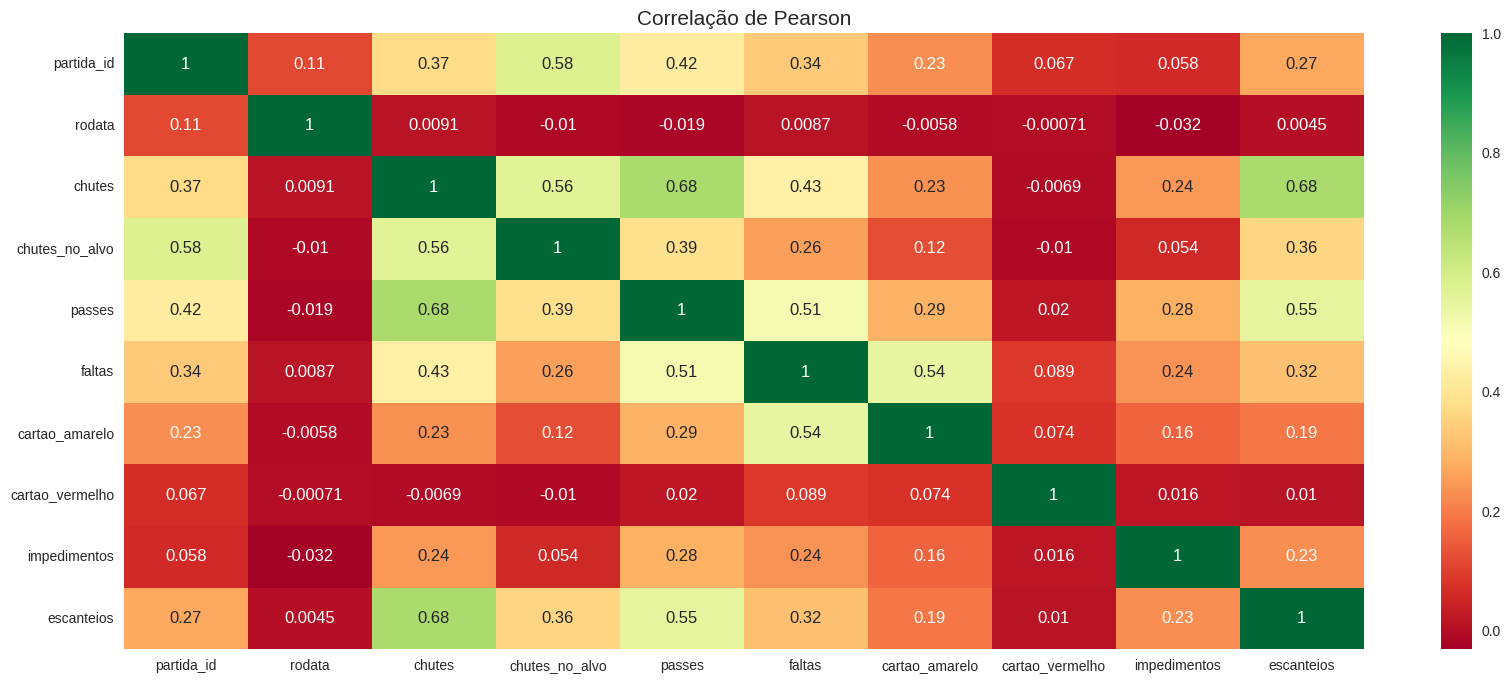

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(dados_copa.corr(), annot = True, cmap= "RdYlGn");
plt.title('Correlação de Pearson',size=15);

<Axes: title={'center': 'Correlação de Spearman'}>

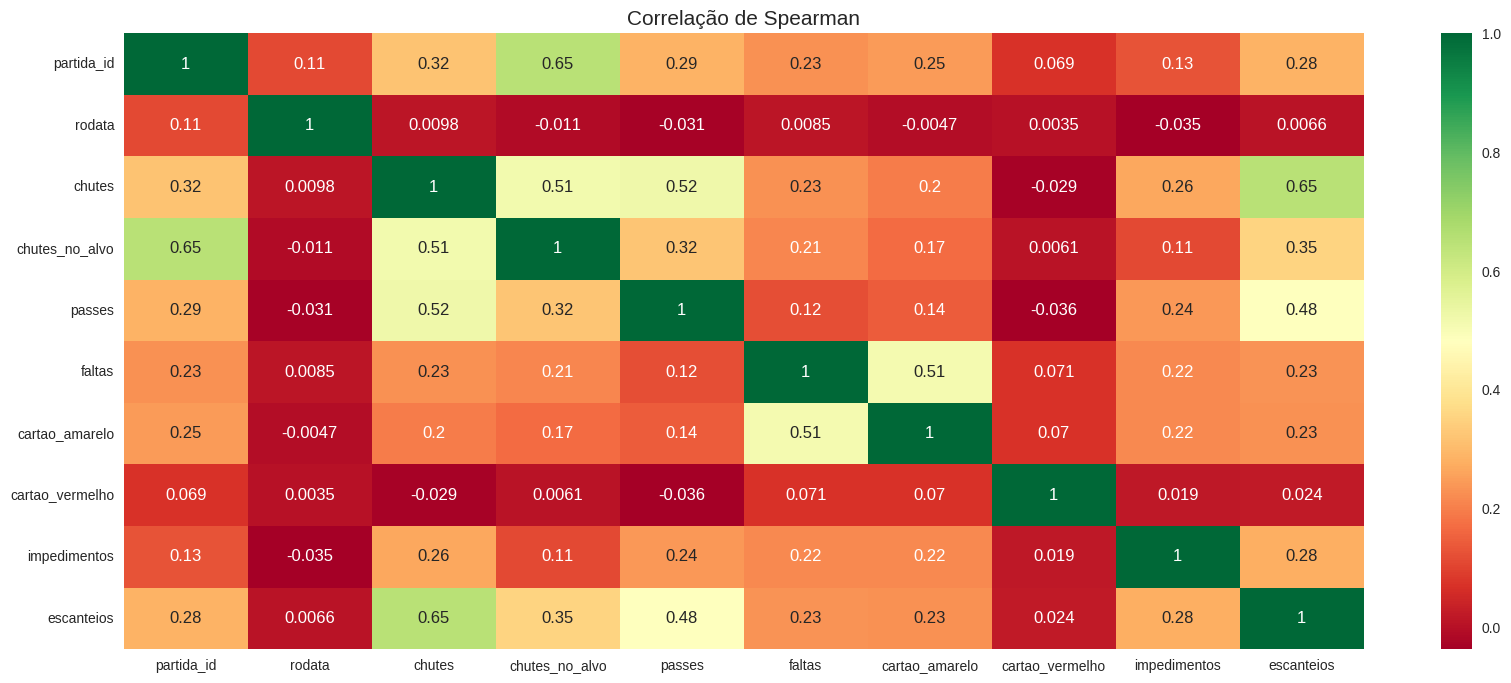

In [ ]:
plt.figure(figsize=(20,8))
plt.title('Correlação de Spearman',size=15)
sns.heatmap(dados_copa.corr('spearman'), annot = True, cmap= "RdYlGn")

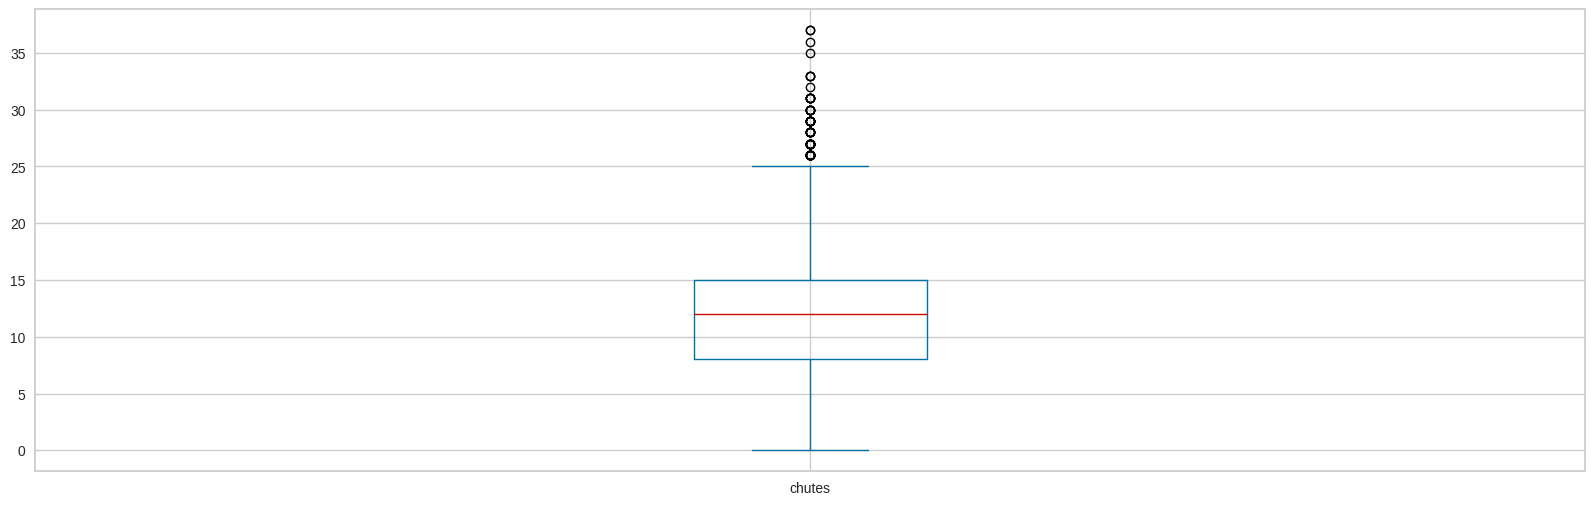

In [ ]:
dados_copa[['chutes']].plot.box(figsize=(20,6));

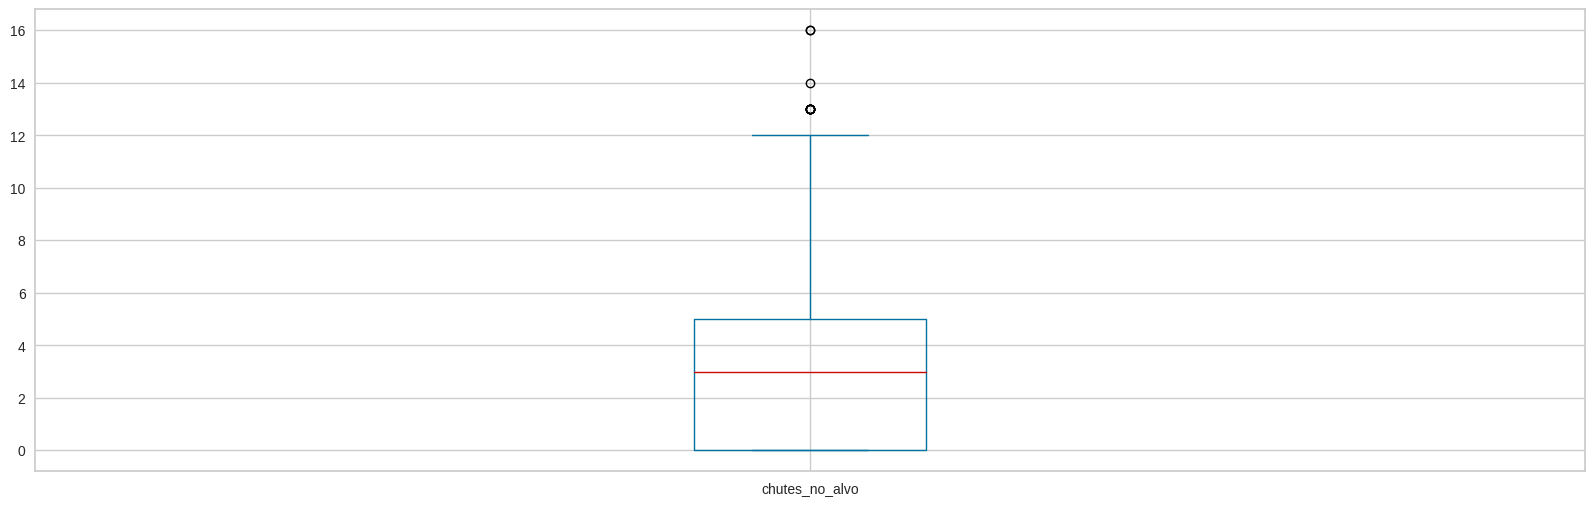

In [ ]:
dados_copa[['chutes_no_alvo']].plot.box(figsize=(20,6));

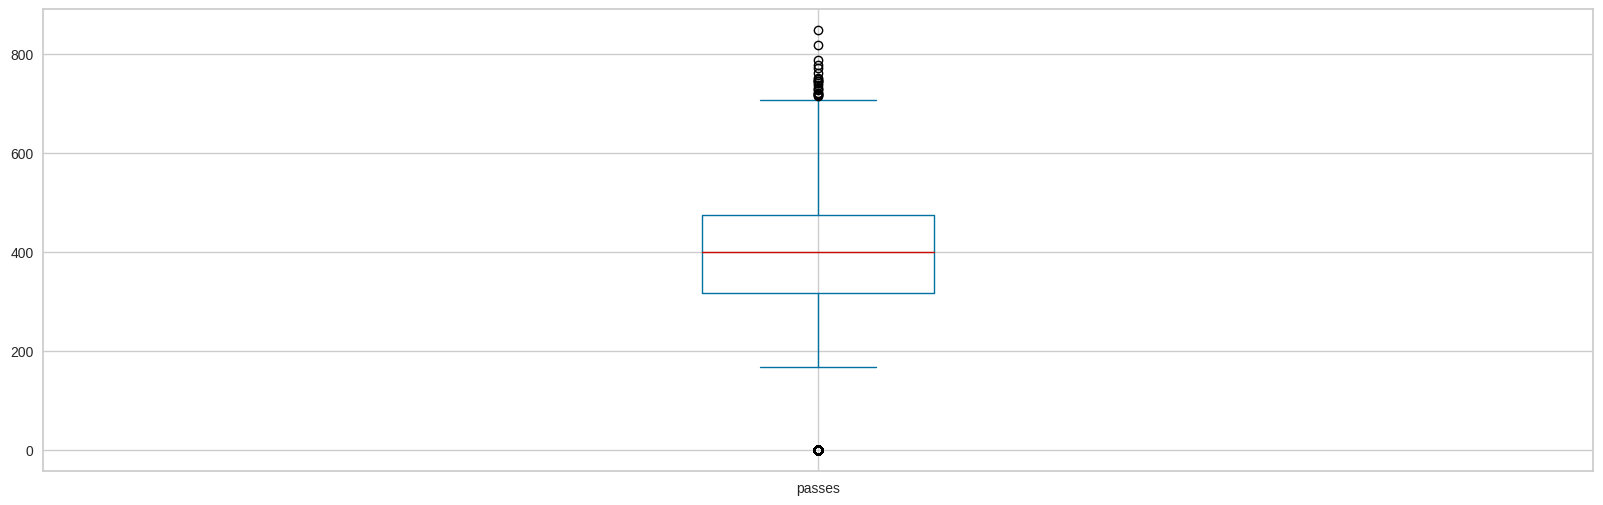

In [16]:
dados_copa[['passes']].plot.box(figsize=(20,6));

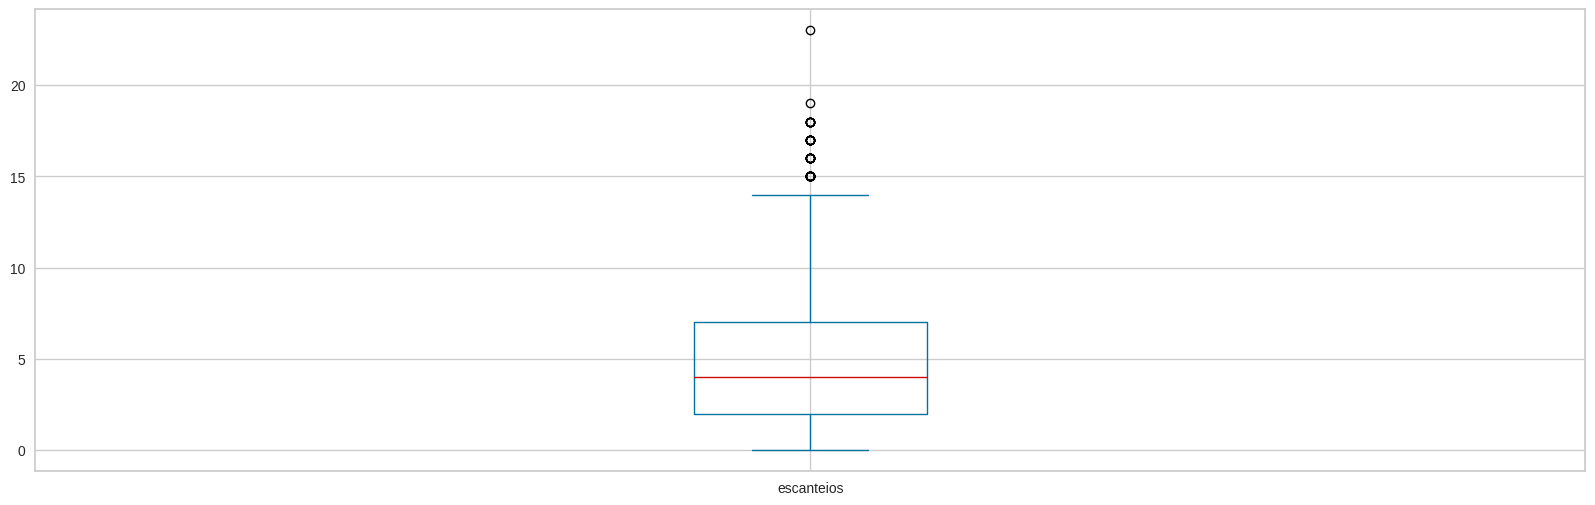

In [17]:
dados_copa[['escanteios']].plot.box(figsize=(20,6));

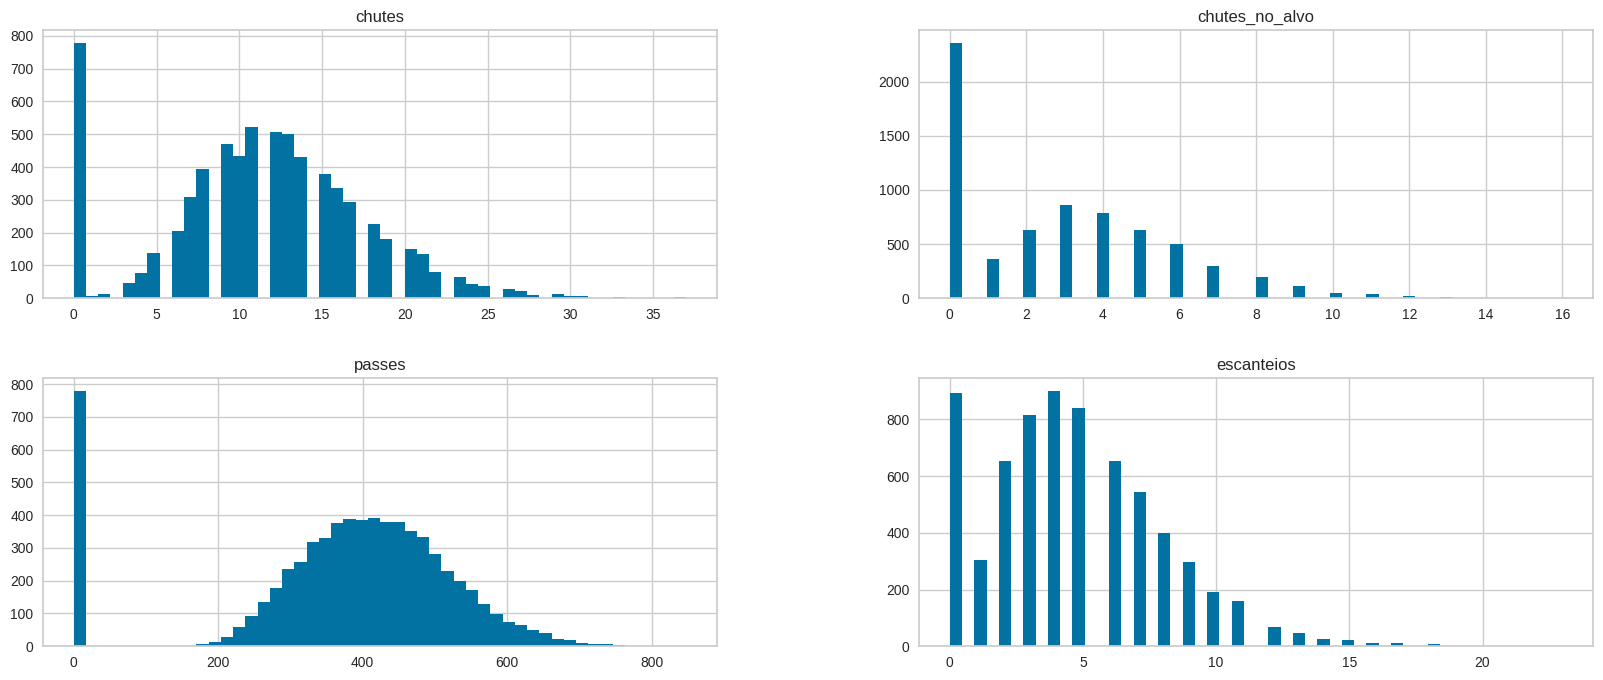

In [18]:
dados_copa[['chutes', 'chutes_no_alvo',
        'passes',
       'escanteios']].hist(figsize=(20,8), bins=50);

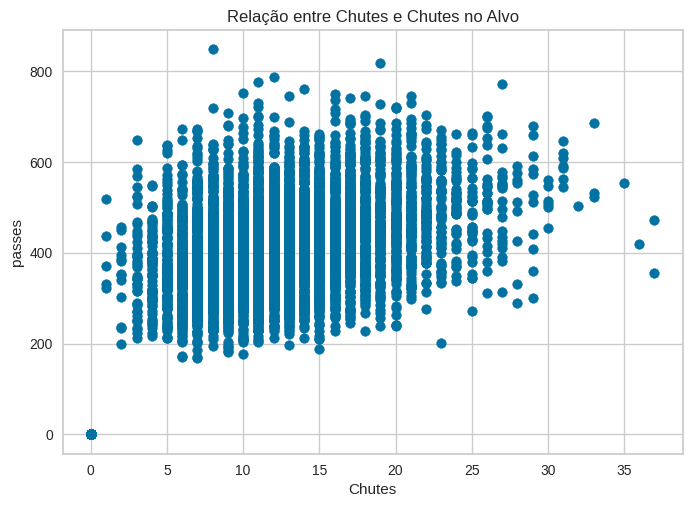

In [ ]:
plt.scatter(dados_copa["chutes"], dados_copa["passes"])
plt.xlabel("Chutes")
plt.ylabel("passes")
plt.title("Relação entre Chutes e Chutes no Alvo")
plt.show()


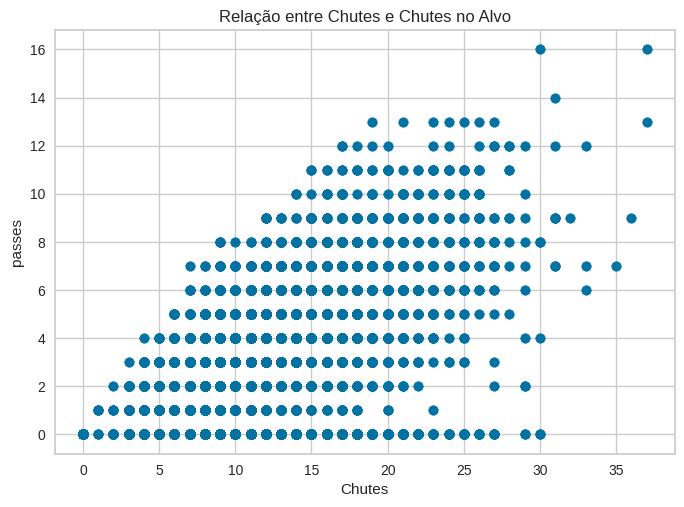

In [19]:
plt.scatter(dados_copa["chutes"], dados_copa["chutes_no_alvo"])
plt.xlabel("Chutes")
plt.ylabel("passes")
plt.title("Relação entre Chutes e Chutes no Alvo")
plt.show()

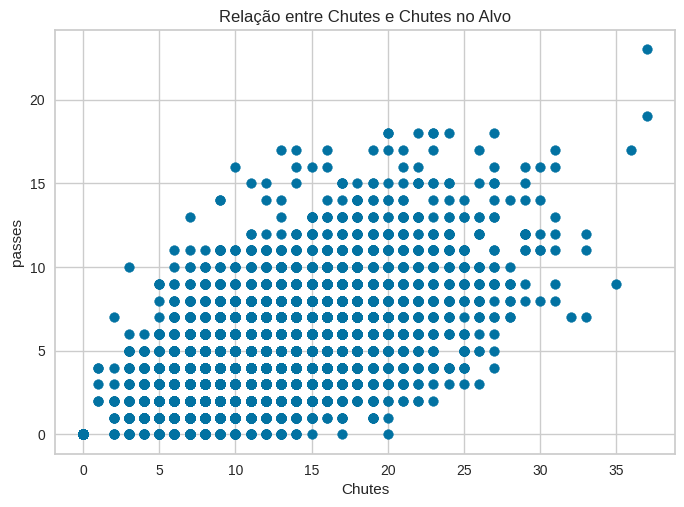

In [20]:
plt.scatter(dados_copa["chutes"], dados_copa["escanteios"])
plt.xlabel("Chutes")
plt.ylabel("passes")
plt.title("Relação entre Chutes e Chutes no Alvo")
plt.show()

In [21]:
X = dados_copa[["passes", "escanteios","chutes_no_alvo"]]
y = dados_copa["chutes"]

# Instanciar e ajustar o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X, y)

# Imprimir os coeficientes e o intercepto do modelo
print("Coeficientes:", modelo.coef_)
print("Intercepto:", modelo.intercept_)
print("R_quadrado:",modelo.score(X,y))


Coeficientes: [0.0137849  0.71436539 0.64616993]
Intercepto: 1.0697021962937647
R_quadrado: 0.6632341512903224


In [22]:
Xp = X.to_numpy()
yp = y.to_numpy()

In [23]:
# Definir as variáveis independentes X e a variável dependente y
X = dados_copa[["passes", "escanteios","chutes_no_alvo"]]
y = dados_copa["chutes"]

# Adicionar uma coluna de intercepto ao DataFrame X
X = sm.add_constant(X)

# Ajustar o modelo de regressão linear
modelo = sm.OLS(y, X)
resultado = modelo.fit()

# Imprimir os resultados
print(resultado.summary())









                            OLS Regression Results                            
Dep. Variable:                 chutes   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     4486.
Date:                Thu, 15 Jun 2023   Prob (F-statistic):               0.00
Time:                        00:25:18   Log-Likelihood:                -18457.
No. Observations:                6838   AIC:                         3.692e+04
Df Residuals:                    6834   BIC:                         3.695e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.0697      0.109      9.

In [24]:
previsoes = resultado.predict(X)

# Converter as previsões e y em listas
x = previsoes.tolist()
Y = y.tolist()

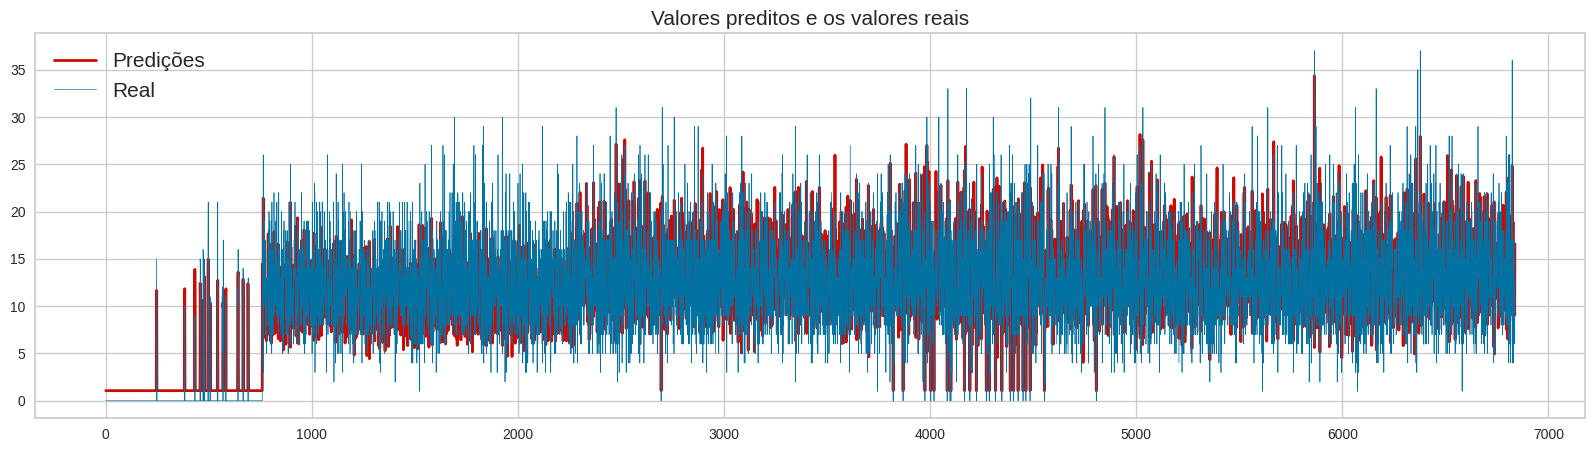

In [25]:
%matplotlib inline
plt.figure(figsize=(20,5))
plt.plot(x, linewidth=2, color='r')
plt.plot(Y, linewidth=0.5,color='b')
plt.title('Valores preditos e os valores reais',size=15)
plt.legend(['Predições','Real'],fontsize=15)
plt.show()

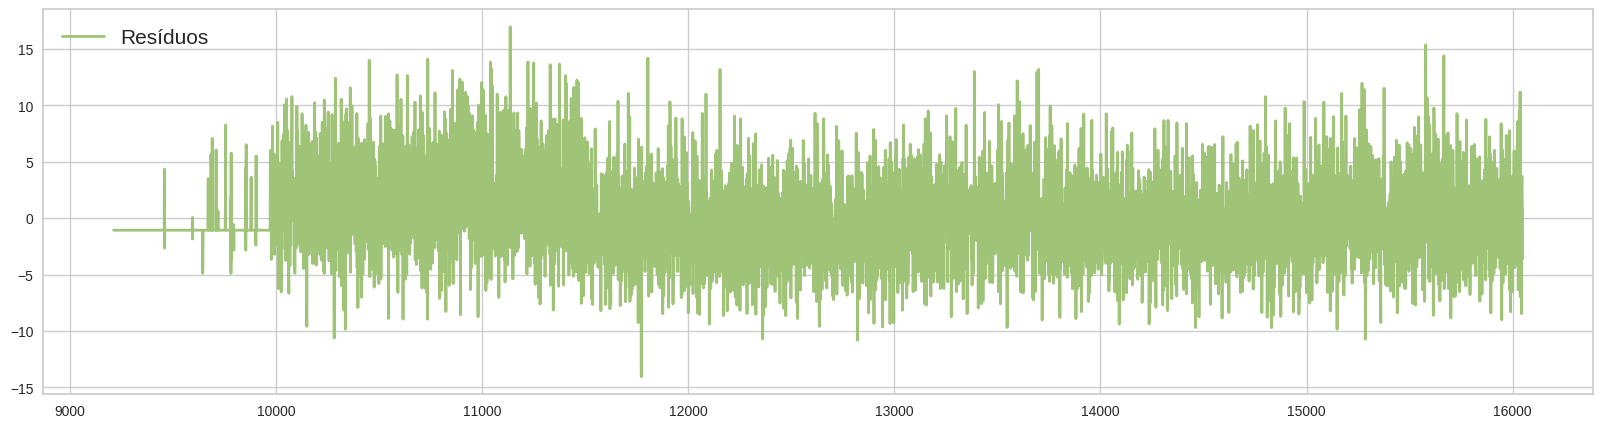

In [26]:
residuos = resultado.resid

# Plot dos resíduos
plt.figure(figsize=(20, 5))
plt.plot(residuos, linewidth=2, color='g')
plt.legend(['Resíduos'], fontsize=15)
plt.show()



In [27]:
X = dados_copa[["passes", "escanteios","chutes_no_alvo"]]
y = dados_copa["chutes"]
# Ajustar o modelo de regressão linear sem intercepto
modelo = sm.OLS(y, X)
resultado = modelo.fit()

# Imprimir os resultados
print(resultado.summary())

                                 OLS Regression Results                                
Dep. Variable:                 chutes   R-squared (uncentered):                   0.922
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                          2.681e+04
Date:                Thu, 15 Jun 2023   Prob (F-statistic):                        0.00
Time:                        00:25:49   Log-Likelihood:                         -18505.
No. Observations:                6838   AIC:                                  3.702e+04
Df Residuals:                    6835   BIC:                                  3.704e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

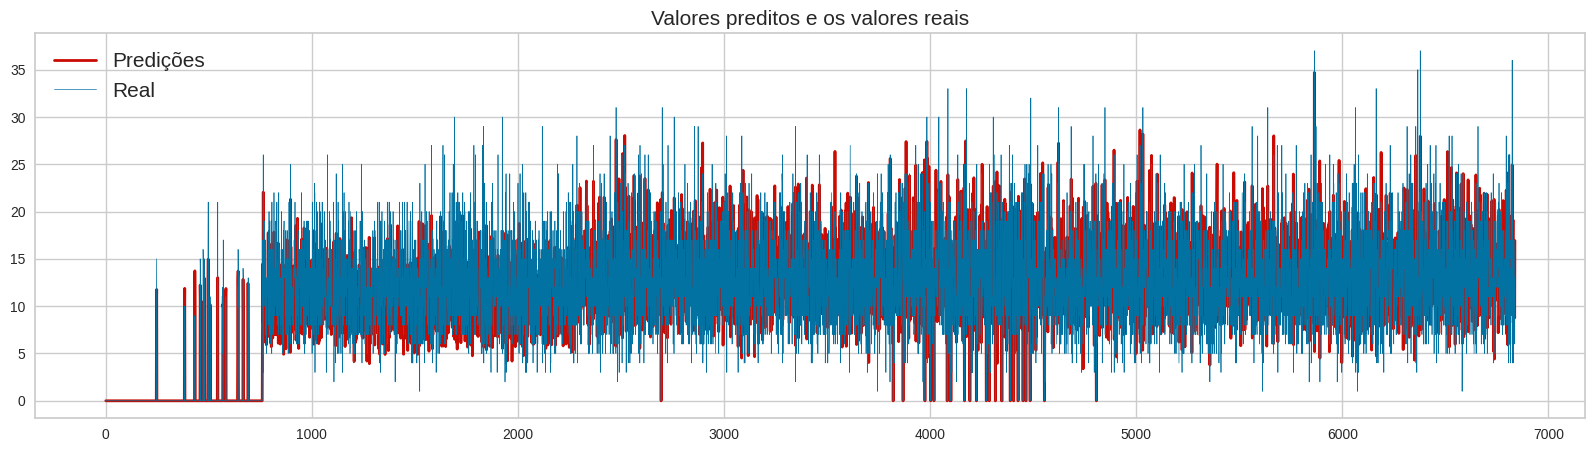

In [28]:
x2 = resultado.predict(X).tolist()

# Converter y em lista
Y2 = y.tolist()

# Plot das previsões e valores reais
plt.figure(figsize=(20, 5))
plt.plot(x2, linewidth=2, color='r')
plt.plot(Y2, linewidth=0.5, color='b')
plt.title('Valores preditos e os valores reais', size=15)
plt.legend(['Predições', 'Real'], fontsize=15)
plt.show()

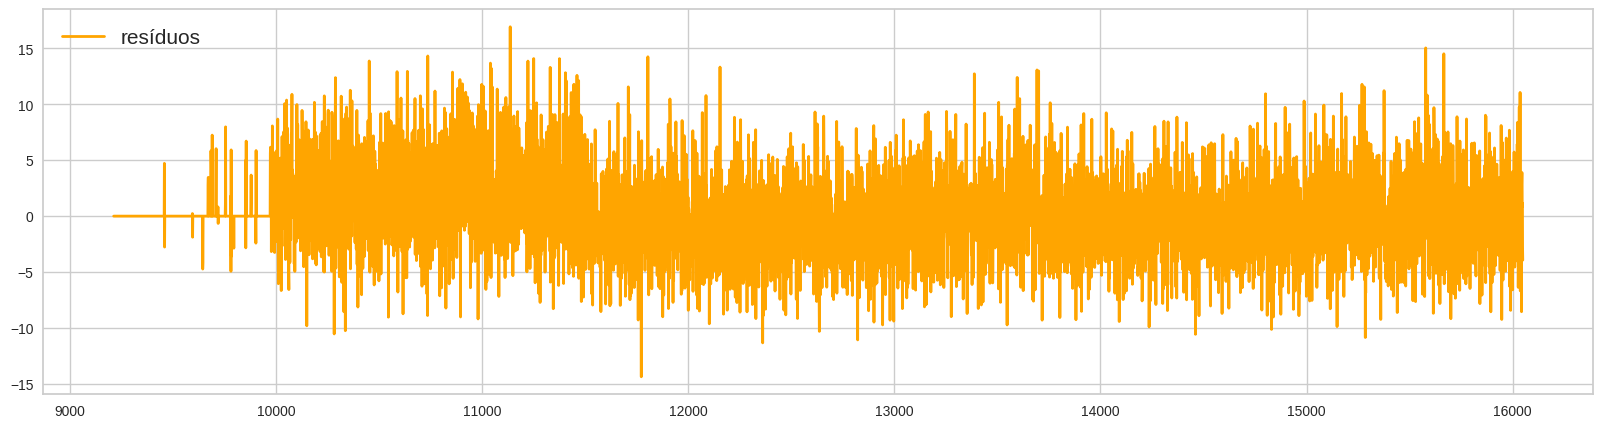

In [29]:
residuals = resultado.resid

# Plotar os resíduos
plt.figure(figsize=(20, 5))
plt.plot(residuals, linewidth=2, color='orange')
plt.legend(['resíduos'], fontsize=15)
plt.show()

In [55]:
modelo1 = (sm.OLS(y,sm.add_constant(X)).fit())
modelo1.summary(title='Sumário do modelo com intercepto')


<class 'statsmodels.iolib.summary.Summary'>
"""
                       Sumário do modelo com intercepto                       
==============================================================================
Dep. Variable:                 chutes   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     4486.
Date:                Thu, 15 Jun 2023   Prob (F-statistic):               0.00
Time:                        00:48:34   Log-Likelihood:                -18457.
No. Observations:                6838   AIC:                         3.692e+04
Df Residuals:                    6834   BIC:                         3.695e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.0697      0.109      9.798      0.000       0.856       1.284
passes             0.0138      0.000     41.904      0.000       0.013       0.014
escanteios         0.7144      0.016     43.951      0.000       0.683       0.746
chutes_no_alvo     0.6462      0.017     37.045      0.000       0.612       0.680
==============================================================================
Omnibus:                      361.377   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              492.108
Skew:                           0.498   Prob(JB):                    1.38e-107
Kurtosis:                       3.858   Cond. No.                     1.02e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
modelo2 = sm.OLS(y,X).fit()
modelo2.summary(title='Sumário do modelo sem intercepto')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Sumário do modelo sem intercepto                           
=======================================================================================
Dep. Variable:                 chutes   R-squared (uncentered):                   0.922
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                          2.681e+04
Date:                Thu, 15 Jun 2023   Prob (F-statistic):                        0.00
Time:                        00:26:20   Log-Likelihood:                         -18505.
No. Observations:                6838   AIC:                                  3.702e+04
Df Residuals:                    6835   BIC:                                  3.704e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
passes             0.0160      0.000     66.405      0.000       0.016       0.016
escanteios         0.7251      0.016     44.408      0.000       0.693       0.757
chutes_no_alvo     0.6546      0.018     37.315      0.000       0.620       0.689
==============================================================================
Omnibus:                      245.300   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              353.259
Skew:                           0.360   Prob(JB):                     1.95e-77
Kurtosis:                       3.850   Cond. No.                         173.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
modelo1.resid
modelo2.resid

9212     0.000000
9213     0.000000
9214     0.000000
9215     0.000000
9216     0.000000
           ...   
16045    3.902361
16046    0.821330
16047    1.170092
16048   -2.763592
16049   -3.936934
Length: 6838, dtype: float64

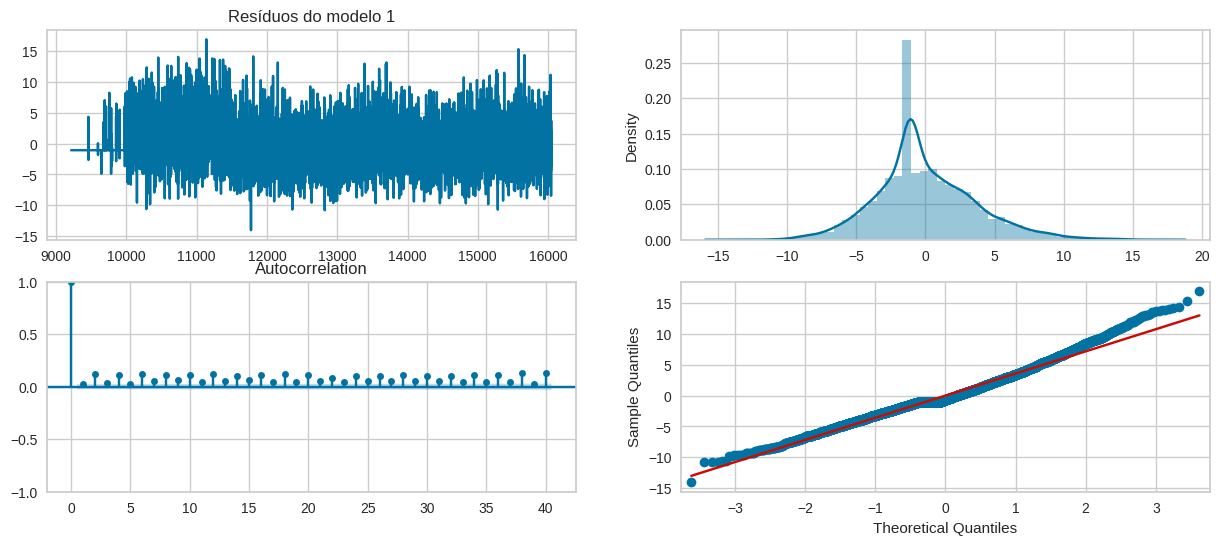

In [33]:
residuos1 = modelo1.resid
fig, ax = plt.subplots(2,2,figsize=(15,6))
residuos1.plot(title="Resíduos do modelo 1", ax=ax[0][0])
sns.distplot(residuos1,ax=ax[0][1])
plot_acf(residuos1,lags=40, ax=ax[1][0])
qqplot(residuos1,line='s', ax=ax[1][1]);

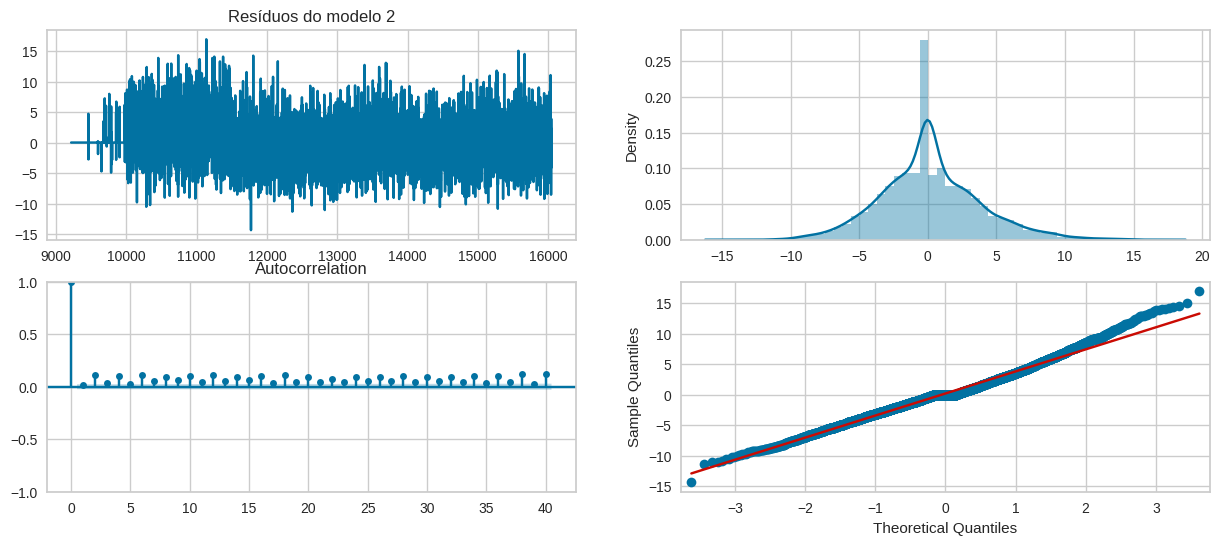

In [ ]:
residuos2 = modelo2.resid
fig, ax = plt.subplots(2,2,figsize=(15,6))
residuos2.plot(title="Resíduos do modelo 2", ax=ax[0][0])
sns.distplot(residuos2,ax=ax[0][1])
plot_acf(residuos2,lags=40, ax=ax[1][0])
qqplot(residuos2,line='s', ax=ax[1][1]);

In [34]:
nome2 = ['Estatística', 'Probabilidade']
teste2 = sms.omni_normtest(modelo2.resid)
lzip(nome2, teste2)

[('Estatística', 245.29955372519657), ('Probabilidade', 5.418495311369994e-54)]

In [50]:
dados_copa2 = dados_copa
dados_copa['residuos1'] = modelo1.resid
dados_copa['residuos2'] = modelo2.resid

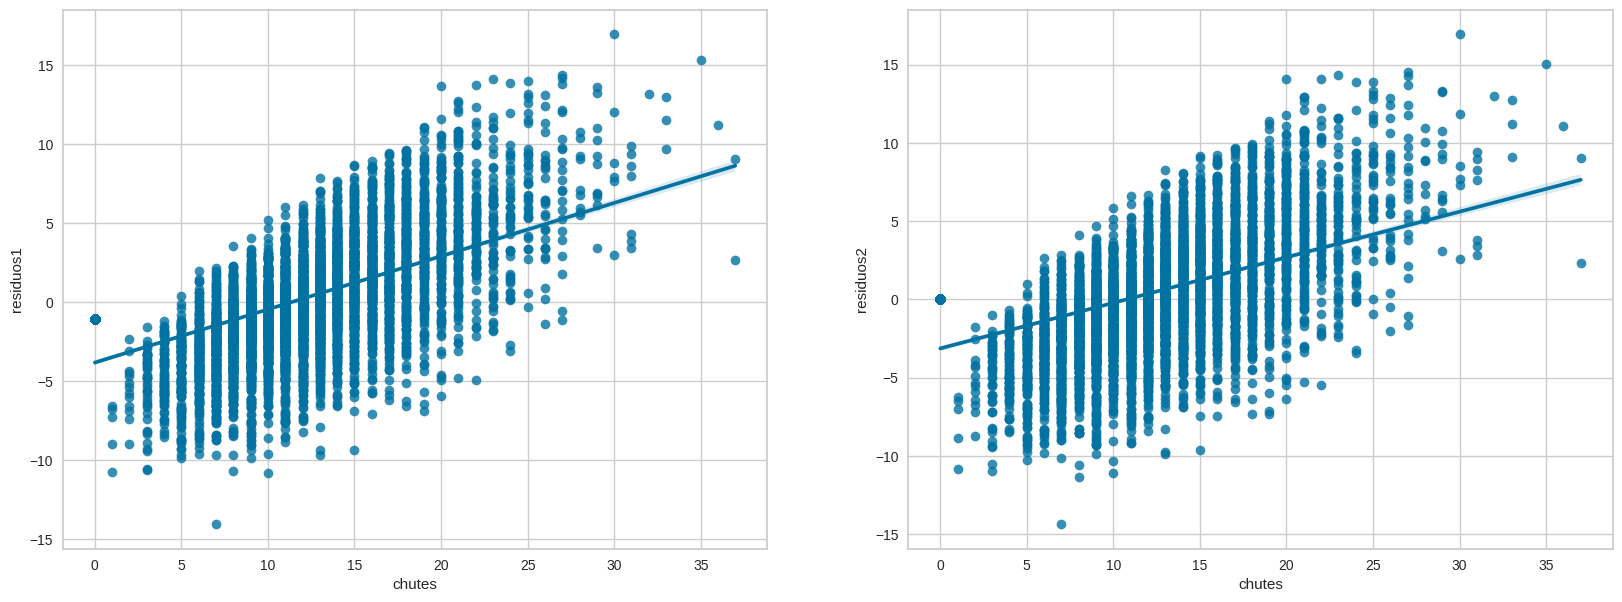

In [56]:
fig, ax = plt.subplots(1,2,figsize=(20,7))
sns.regplot(x='chutes',y='residuos1',data=dados_copa2, ax=ax[0])
sns.regplot(x='chutes',y='residuos2',data=dados_copa2, ax=ax[1]);

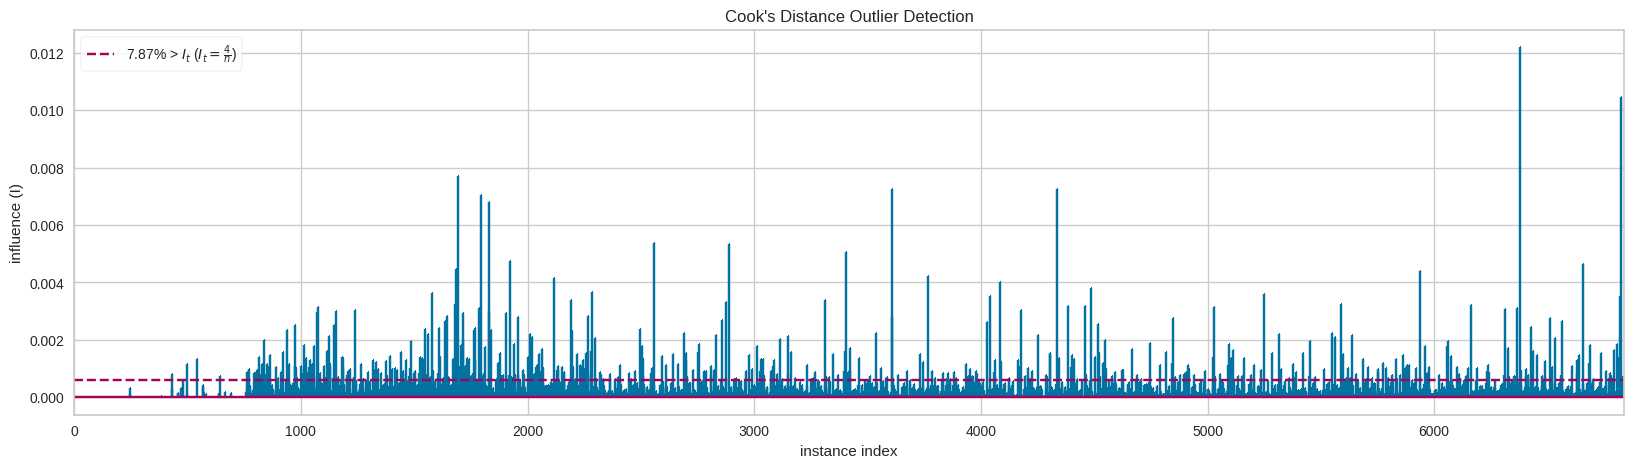

In [57]:
plt.figure(figsize=(20,5))
CooksDistance().fit(X, y).show();

In [71]:

import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Carregar a base de dados
dados = pd.read_csv("/content/campeonato-brasileiro-estatisticas-full.csv")

# Ajustar o modelo de ANOVA
modelo = ols('chutes ~ escanteios + chutes_no_alvo + passes', data=dados).fit()

# Calcular a tabela ANOVA
anova_results = sm.stats.anova_lm(modelo)

# Imprimir os resultados da ANOVA
print(anova_results)


                     df         sum_sq        mean_sq              F  PR(>F)
escanteios          1.0  575110.765206  575110.765206  102975.928069     0.0
chutes_no_alvo      1.0   53469.680980   53469.680980    9573.964453     0.0
passes              1.0   51394.982319   51394.982319    9202.481196     0.0
Residual        16046.0   89615.384018       5.584905            NaN     NaN


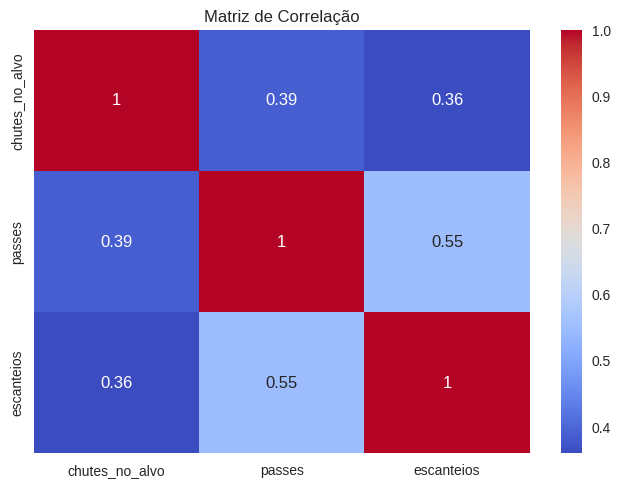

In [ ]:
X = dados_copa[['chutes_no_alvo', 'passes', 'escanteios']]
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

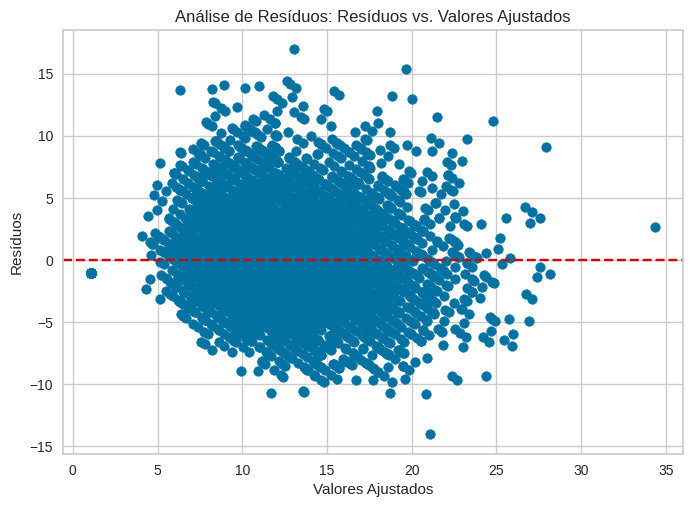

In [ ]:
modelo = sm.OLS(dados_copa['chutes'], sm.add_constant(dados_copa[['chutes_no_alvo', 'passes', 'escanteios']]))
results = modelo.fit()
residuos = results.resid

# Plotar gráfico de resíduos vs. valores ajustados
plt.scatter(results.fittedvalues, residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.title('Análise de Resíduos: Resíduos vs. Valores Ajustados')
plt.show()

In [ ]:
normalidade_teste = sm.stats.normal_ad(residuos)
print(normalidade_teste)

(51.69501625997782, 0.0)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

variaveis = ["passes", "chutes_no_alvo", "escanteios"]

# Criar um objeto MinMaxScaler
scaler = MinMaxScaler()

# Aplicar a normalização às variáveis selecionadas
dados_copa[variaveis] = scaler.fit_transform(dados_copa[variaveis])

# Visualizar o resultado
print(dados_copa[variaveis])











         passes  chutes_no_alvo  escanteios
9212   0.000000          0.0000    0.000000
9213   0.000000          0.0000    0.000000
9214   0.000000          0.0000    0.000000
9215   0.000000          0.0000    0.000000
9216   0.000000          0.0000    0.000000
...         ...             ...         ...
16045  0.413915          0.4375    0.173913
16046  0.338443          0.5000    0.260870
16047  0.360849          0.1250    0.217391
16048  0.389151          0.1250    0.130435
16049  0.696934          0.4375    0.173913

[6838 rows x 3 columns]


                  passes  escanteios  chutes_no_alvo
passes          1.000000    0.821469        0.684514
escanteios      0.821469    1.000000        0.643499
chutes_no_alvo  0.684514    0.643499        1.000000
Estatística de Durbin-Watson: 1.9559155069974117
Variáveis significativas: ['Intercept', 'passes', 'escanteios', 'chutes_no_alvo']
Conclusões da análise...
Referência: /content/campeonato-brasileiro-estatisticas-full.csv


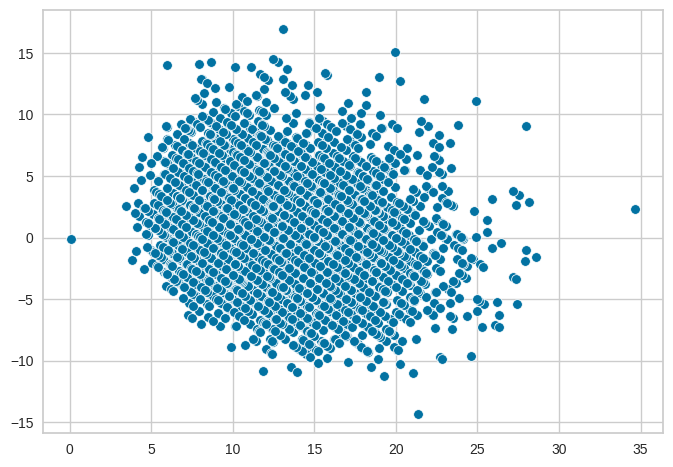

In [73]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns

# Carregar a base de dados
dados_copa = pd.read_csv("/content/campeonato-brasileiro-estatisticas-full.csv")

# Verificar a matriz de correlação entre as variáveis explicativas
correlation_matrix = dados_copa[["passes", "escanteios", "chutes_no_alvo"]].corr()
print(correlation_matrix)

# Ajustar o modelo de regressão
modelo = ols('chutes ~ passes + escanteios + chutes_no_alvo', data=dados_copa).fit()

# Realizar análise de resíduos
residuos = modelo.resid

# Plotar gráfico de dispersão de resíduos versus valores ajustados
sns.scatterplot(x=modelo.fittedvalues, y=residuos)

# Teste de Durbin-Watson para autocorrelação dos resíduos
durbin_watson_test = sm.stats.stattools.durbin_watson(residuos)
print("Estatística de Durbin-Watson:", durbin_watson_test)

# Selecionar variáveis significativas
variaveis_significativas = modelo.pvalues[modelo.pvalues < 0.05].index.tolist()
print("Variáveis significativas:", variaveis_significativas)

# Aplicar transformações de variáveis, se necessário

# Conclusão e referência
print("Conclusões da análise...")
print("Referência: /content/campeonato-brasileiro-estatisticas-full.csv")
